In [35]:
import yfinance as yf
import pandas as pd
import os
# from datetime import datetime, timedelta

In [36]:
stock = "AAPL"
data = yf.download(stock, start="2023-01-01")
print(data.tail())
# start = '2023-01-01'
# end = '2024-12-21'
# stock = 'AAPL'

# data = yf.download(stock, start)
# dfs = []
# date_ranges = [("2023-01-01", "2023-03-31"), ("2023-04-01", "2023-06-30"), ("2023-07-01", "2023-12-31")]

# for start, end in date_ranges:
#     data = yf.download("AAPL", start=start, end=end)
#     dfs.append(data)
    
# full_data = pd.concat(dfs)
# print(full_data.tail())

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2025-05-19  208.779999  209.479996  204.259995  207.910004  46140500
2025-05-20  206.860001  208.470001  205.029999  207.669998  42496600
2025-05-21  202.089996  207.039993  200.710007  205.169998  59211800
2025-05-22  201.360001  202.750000  199.699997  200.710007  46742400
2025-05-23  195.270004  197.699997  193.460007  193.669998  78314800


In [37]:
if os.path.exists("sp500.csv"):
    sp500 = pd.read_csv("sp500.csv", index_col=0)
else:
    sp500 = yf.Ticker("^GSPC")
    sp500 = sp500.history(period="max")
    sp500.to_csv("sp500.csv")

In [38]:
sp500.index = pd.to_datetime(sp500.index)
sp500

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5860\2085709090.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  sp500.index = pd.to_datetime(sp500.index)


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-05-19 00:00:00-04:00,5902.879883,5968.609863,5895.689941,5963.600098,4144010000,0.0,0.0
2025-05-20 00:00:00-04:00,5944.660156,5953.060059,5909.259766,5940.459961,4416850000,0.0,0.0
2025-05-21 00:00:00-04:00,5910.180176,5938.370117,5830.910156,5844.609863,5254250000,0.0,0.0


<Axes: xlabel='Date'>

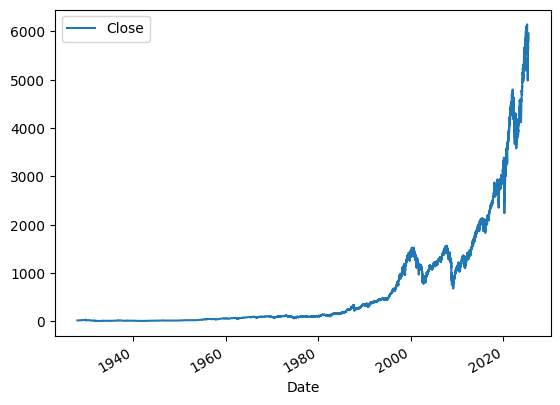

In [39]:
sp500.plot.line(y="Close", use_index=True)

In [40]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [41]:
# sp500["Tomorrow"] = sp500["Close"].shift(-1)
# data = data.dropna()
# sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
# sp500 = sp500.loc["2021-01-01":].copy()
sp500["MA10"] = sp500["Close"].rolling(window=10).mean()
sp500["MA50"] = sp500["Close"].rolling(window=50).mean()
sp500["Target"] = (sp500["MA10"] > sp500["MA50"]).astype(int)
sp500 = sp500.dropna()
sp500

,Open,High,Low,Close,Volume,MA10,MA50,Target
Date,,,,,,,,
1928-03-13 00:00:00-05:00,17.920000,17.920000,17.920000,17.920000,0,17.617000,17.473000,1
1928-03-14 00:00:00-05:00,17.930000,17.930000,17.930000,17.930000,0,17.684000,17.478400,1
1928-03-15 00:00:00-05:00,18.070000,18.070000,18.070000,18.070000,0,17.761000,17.484600,1
1928-03-16 00:00:00-05:00,18.260000,18.260000,18.260000,18.260000,0,17.857000,17.495400,1
1928-03-19 00:00:00-05:00,18.360001,18.360001,18.360001,18.360001,0,17.936000,17.511600,1
...,...,...,...,...,...,...,...,...
2025-05-19 00:00:00-04:00,5902.879883,5968.609863,5895.689941,5963.600098,4144010000,5802.427002,5562.186006,1
2025-05-20 00:00:00-04:00,5944.660156,5953.060059,5909.259766,5940.459961,4416850000,5835.781982,5568.704004,1
2025-05-21 00:00:00-04:00,5910.180176,5938.370117,5830.910156,5844.609863,5254250000,5857.114990,5574.154805,1


In [42]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [43]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.42

                           Target  0
Date                                
2024-12-30 00:00:00-05:00       1  1
2024-12-31 00:00:00-05:00       1  1
2025-01-02 00:00:00-05:00       0  1
2025-01-03 00:00:00-05:00       0  1
2025-01-06 00:00:00-05:00       1  1
...                           ... ..
2025-05-19 00:00:00-04:00       1  1
2025-05-20 00:00:00-04:00       1  1
2025-05-21 00:00:00-04:00       1  1
2025-05-22 00:00:00-04:00       1  1
2025-05-23 00:00:00-04:00       1  1

[100 rows x 2 columns]


<Axes: xlabel='Date'>

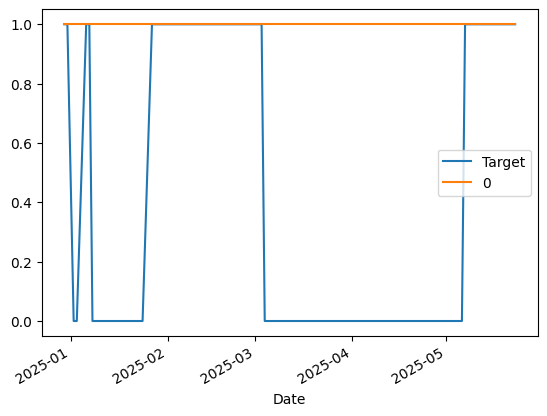

In [62]:
combined = pd.concat([test["Target"], preds], axis=1)
print(combined)
combined.plot()


In [45]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [46]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    print(data.shape)
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [47]:
predictions = backtest(sp500, model, predictors)

(24416, 8)


In [48]:
precision_score(predictions["Target"], predictions["Predictions"])

0.6537678207739308

In [49]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.626711
0    0.373289
Name: count, dtype: float64

In [50]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    # print(rolling_averages.head(5))
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors+= [ratio_column, trend_column]
# sp500 = sp500.dropna(subset=sp500.columns[sp500.columns != "Tomorrow"])
sp500

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5860\3968259760.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_5860\3968259760.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_5860\3968259760.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

,Open,High,Low,Close,Volume,MA10,MA50,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,
1928-03-13 00:00:00-05:00,17.920000,17.920000,17.920000,17.920000,0,17.617000,17.473000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1928-03-14 00:00:00-05:00,17.930000,17.930000,17.930000,17.930000,0,17.684000,17.478400,1,1.000279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1928-03-15 00:00:00-05:00,18.070000,18.070000,18.070000,18.070000,0,17.761000,17.484600,1,1.003889,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1928-03-16 00:00:00-05:00,18.260000,18.260000,18.260000,18.260000,0,17.857000,17.495400,1,1.005230,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1928-03-19 00:00:00-05:00,18.360001,18.360001,18.360001,18.360001,0,17.936000,17.511600,1,1.002731,2.0,1.013917,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-19 00:00:00-04:00,5902.879883,5968.609863,5895.689941,5963.600098,4144010000,5802.427002,5562.186006,1,1.000438,2.0,1.006751,5.0,1.062402,15.0,1.046444,180.0,1.270919,650.0
2025-05-20 00:00:00-04:00,5944.660156,5953.060059,5909.259766,5940.459961,4416850000,5835.781982,5568.704004,1,0.998056,2.0,1.001023,5.0,1.058414,15.0,1.041921,180.0,1.265517,650.0
2025-05-21 00:00:00-04:00,5910.180176,5938.370117,5830.910156,5844.609863,5254250000,5857.114990,5574.154805,1,0.991867,2.0,0.986466,5.0,1.041678,15.0,1.024734,180.0,1.244662,650.0


In [51]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [52]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [53]:
predictions = backtest(sp500, model, new_predictors)

(24416, 18)


In [54]:
print(sp500.tail(5))  # xem các dòng cuối cùng có ngày 2025-04-23 không


                                  Open         High          Low        Close  \
Date                                                                            
2025-05-19 00:00:00-04:00  5902.879883  5968.609863  5895.689941  5963.600098   
2025-05-20 00:00:00-04:00  5944.660156  5953.060059  5909.259766  5940.459961   
2025-05-21 00:00:00-04:00  5910.180176  5938.370117  5830.910156  5844.609863   
2025-05-22 00:00:00-04:00  5841.259766  5878.080078  5825.819824  5842.009766   
2025-05-23 00:00:00-04:00  5781.890137  5829.509766  5767.410156  5802.819824   

                               Volume         MA10         MA50  Target  \
Date                                                                      
2025-05-19 00:00:00-04:00  4144010000  5802.427002  5562.186006       1   
2025-05-20 00:00:00-04:00  4416850000  5835.781982  5568.704004       1   
2025-05-21 00:00:00-04:00  5254250000  5857.114990  5574.154805       1   
2025-05-22 00:00:00-04:00  5157050000  5874.921973  5579.

In [55]:
from datetime import datetime

now = datetime.now()
print(now)  # Ví dụ: 2025-04-23 14:30:15.123456
print(now.time())  # Ví dụ: 14:30:15.123456


2025-05-27 19:44:32.323178
19:44:32.323178


In [56]:
predictions

,Target,Predictions
Date,,
1938-03-17 00:00:00-05:00,0,0.0
1938-03-18 00:00:00-05:00,0,0.0
1938-03-21 00:00:00-05:00,0,0.0
1938-03-22 00:00:00-05:00,0,0.0
1938-03-23 00:00:00-05:00,0,0.0
...,...,...
2025-05-19 00:00:00-04:00,1,1.0
2025-05-20 00:00:00-04:00,1,1.0
2025-05-21 00:00:00-04:00,1,1.0


In [57]:
predictions["Predictions"].value_counts()

Predictions
1.0    13651
0.0     8265
Name: count, dtype: int64

In [58]:
precision_score(predictions["Target"], predictions["Predictions"])

0.9810270309867409

In [59]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.626711
0    0.373289
Name: count, dtype: float64

In [60]:
predictions

,Target,Predictions
Date,,
1938-03-17 00:00:00-05:00,0,0.0
1938-03-18 00:00:00-05:00,0,0.0
1938-03-21 00:00:00-05:00,0,0.0
1938-03-22 00:00:00-05:00,0,0.0
1938-03-23 00:00:00-05:00,0,0.0
...,...,...
2025-05-19 00:00:00-04:00,1,1.0
2025-05-20 00:00:00-04:00,1,1.0
2025-05-21 00:00:00-04:00,1,1.0


In [61]:
import joblib

# Lưu model
joblib.dump(model, "random_forest_model.pkl")
print("Saved model")


Saved model
